<a href="https://colab.research.google.com/github/naveennekkanti1/Zeotap/blob/main/Nekkanti_DurgaNaveen_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Davies-Bouldin Index: 0.5500506791688471
Silhouette Score: 0.53754705918161


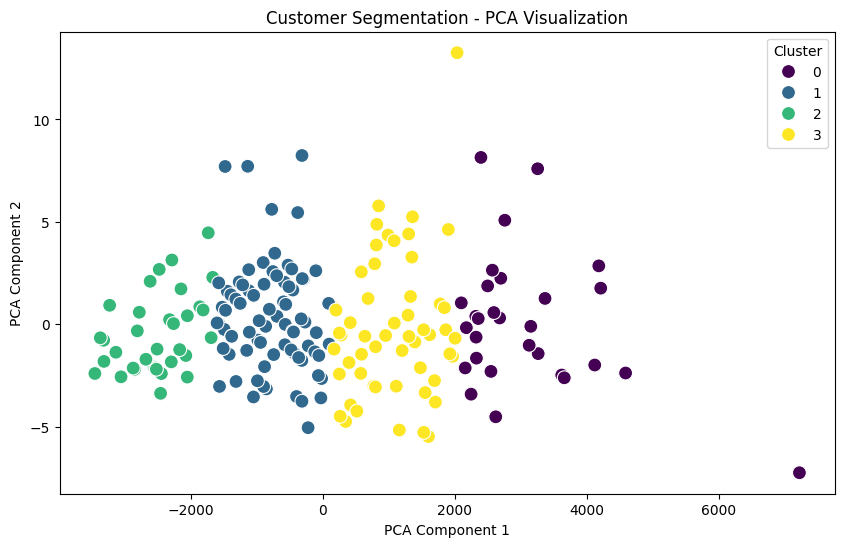

Clustering results saved to 'FirstName_LastName_Clustering.csv'.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("/content/drive/MyDrive/Zetop/Customers.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Zetop/Transactions.csv")

# Merge customer profiles with aggregated transaction data
customer_transactions = transactions.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum"
}).reset_index()
customer_data = customers.merge(customer_transactions, on="CustomerID", how="left").fillna(0)

# Encode categorical variables (Region)
customer_data_encoded = pd.get_dummies(customer_data, columns=["Region"], drop_first=True)

# Prepare feature matrix
features = customer_data_encoded.drop(columns=["CustomerID", "CustomerName", "SignupDate"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 1: Apply K-Means Clustering
n_clusters = 4  # Adjust based on experimentation
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataset
customer_data_encoded['Cluster'] = clusters

# Step 2: Evaluate Clustering
db_index = davies_bouldin_score(scaled_features, clusters)
silhouette_avg = silhouette_score(scaled_features, clusters)

print(f"Number of Clusters: {n_clusters}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

# Step 3: Visualize Clusters using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=clusters, palette="viridis", s=100)
plt.title(f"Customer Segmentation (K-Means with {n_clusters} Clusters)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Save clustering results
clustering_results = customer_data_encoded[["CustomerID", "Cluster"]]
clustering_results.to_csv("/content/drive/MyDrive/Zetop/Clustering_Results.csv", index=False)

print("Clustering results saved to 'Clustering_Results.csv'.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
